# Sparse Hebbian Learning : testing unsupervised learning with different learning rates

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
import time
time.sleep(3600*12)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7

shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
data = shl.get_data()

Extracting data..yose07.png, craterlake12.png, clouds43.png, rocky10.png, bora04.png, koala52.png, flowerhill29.png, hibiscus30.png, calcoast09.png, yose05.png, cattails70.png, cucorn50.png, bittern62.png, yellowleaves39.png, bird08.png, geyser27.png, woods54.png, flowers37.png, goldwater67.png, reflection63.png, 
Data is of shape : (81920, 256) - done in 4.96s.

## different learning rates

In [ ]:
%ls -l data_cache/

In [5]:
!rm -fr /Users/laurentperrinet/tmp/data_cache/hom*lock*

In [ ]:
%ls -l data_cache/

total 6175272
-rw-r--r--  1 laurentperrinet  staff   212336720 Nov 30 14:33 homeo - eta=0.0005_coding.npy
-rw-r--r--  1 laurentperrinet  staff     3012552 Nov 30 14:32 homeo - eta=0.0005_dico.pkl
-rw-r--r--  1 laurentperrinet  staff   212336720 Nov 30 16:53 homeo - eta=0.0010772173450159417_coding.npy
-rw-r--r--  1 laurentperrinet  staff     3012552 Nov 30 16:50 homeo - eta=0.0010772173450159417_dico.pkl
-rw-r--r--  1 laurentperrinet  staff           0 Dec  1 12:28 homeo - eta=0.0015_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff           0 Dec  1 12:28 homeo - eta=0.0015_dico.pkl_lock_pid-71683_host-ekla
-rw-r--r--  1 laurentperrinet  staff   212336720 Nov 30 17:52 homeo - eta=0.0023207944168063895_coding.npy
-rw-r--r--  1 laurentperrinet  staff     3012552 Nov 30 17:50 homeo - eta=0.0023207944168063895_dico.pkl
-rw-r--r--  1 laurentperrinet  staff           0 Dec  1 09:10 homeo - eta=0.005_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff           0 Dec  1 09:10 homeo - eta=0.

the computation is locked data_cache/homeo - eta=0.0015_dico.pkl_lock_pid-75052_host-ekla
No cache found data_cache/homeo - eta=0.003231652035047825_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   65536 (elapsed time:   0s,  0.0mn)
Iteration  6554 /   65536 (elapsed time:  1430s,  23.0mn)
Iteration  13108 /   65536 (elapsed time:  2816s,  46.0mn)
Iteration  19662 /   65536 (elapsed time:  4188s,  69.0mn)
Iteration  26216 /   65536 (elapsed time:  5572s,  92.0mn)
Iteration  32770 /   65536 (elapsed time:  6952s,  115.0mn)
Iteration  39324 /   65536 (elapsed time:  8318s,  138.0mn)
Iteration  45878 /   65536 (elapsed time:  9705s,  161.0mn)
Iteration  52432 /   65536 (elapsed time:  11108s,  185.0mn)
Iteration  58986 /   65536 (elapsed time:  12492s,  208.0mn)
Learning code... done (total time:  13880s,  231.3mn)
done in 13881.14s.
No cache found data_cache/homeo - eta=0.003231652035047825_coding.npy: Coding with algo = mp 
 Coding data w

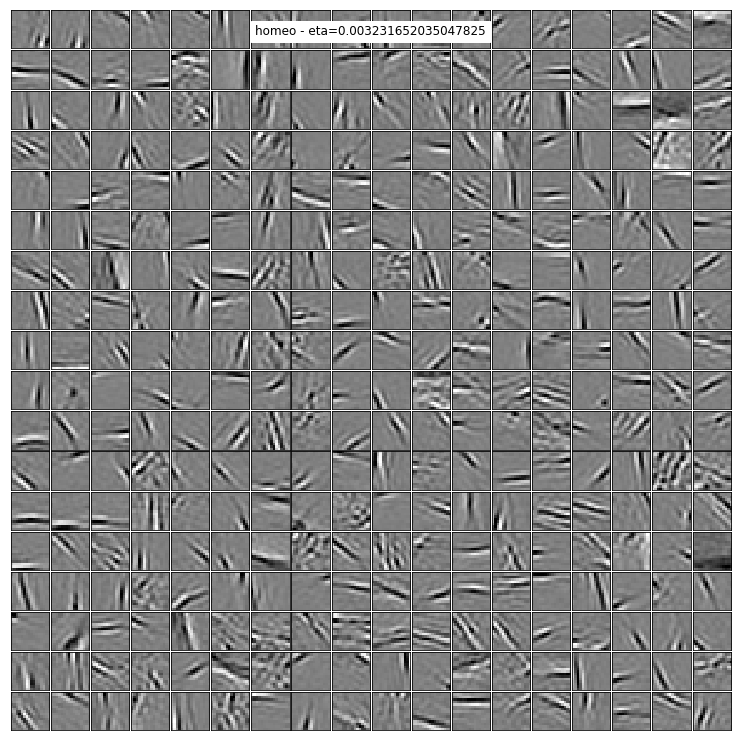

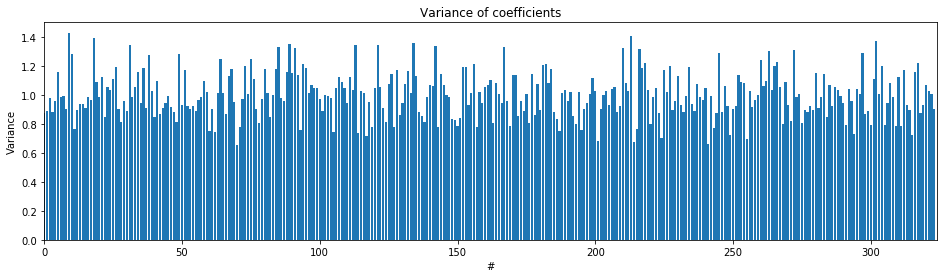

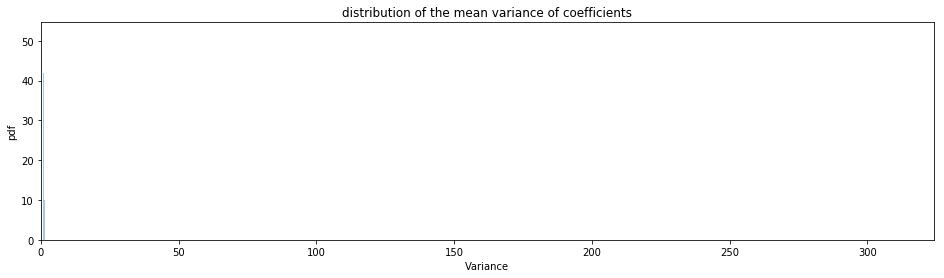

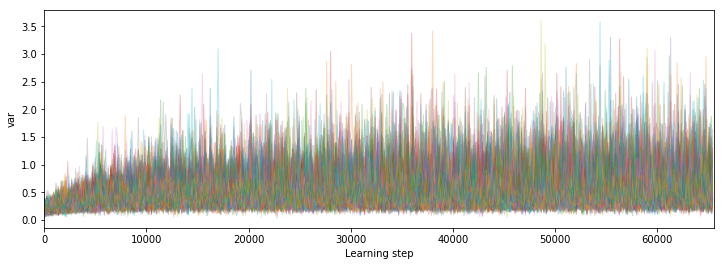

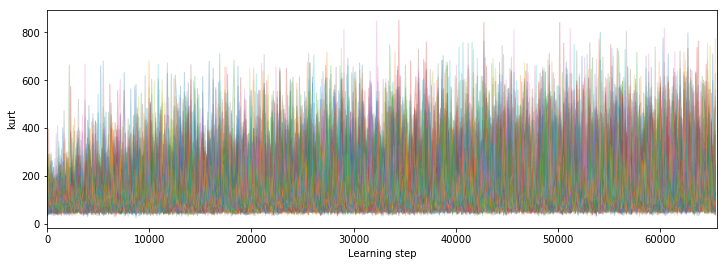

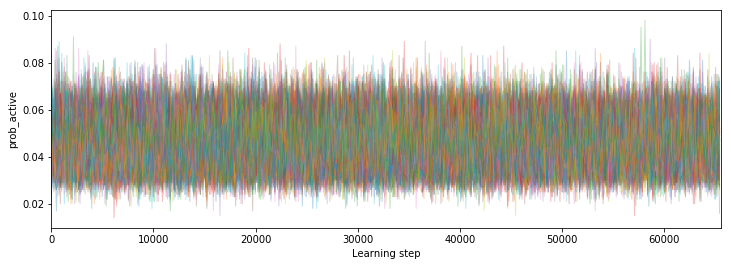

No cache found data_cache/homeo - eta=0.006962383250419168_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   65536 (elapsed time:   0s,  0.0mn)
Iteration  6554 /   65536 (elapsed time:  1467s,  24.0mn)
Iteration  13108 /   65536 (elapsed time:  2857s,  47.0mn)
Iteration  19662 /   65536 (elapsed time:  4242s,  70.0mn)
Iteration  26216 /   65536 (elapsed time:  5619s,  93.0mn)
Iteration  32770 /   65536 (elapsed time:  7000s,  116.0mn)
Iteration  39324 /   65536 (elapsed time:  8393s,  139.0mn)
Iteration  45878 /   65536 (elapsed time:  9783s,  163.0mn)
Iteration  52432 /   65536 (elapsed time:  11177s,  186.0mn)
Iteration  58986 /   65536 (elapsed time:  12575s,  209.0mn)
Learning code... done (total time:  13972s,  232.9mn)
done in 13972.50s.
No cache found data_cache/homeo - eta=0.006962383250419168_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 117.06s.
loading the code called : data_cache/homeo - eta=0.0069

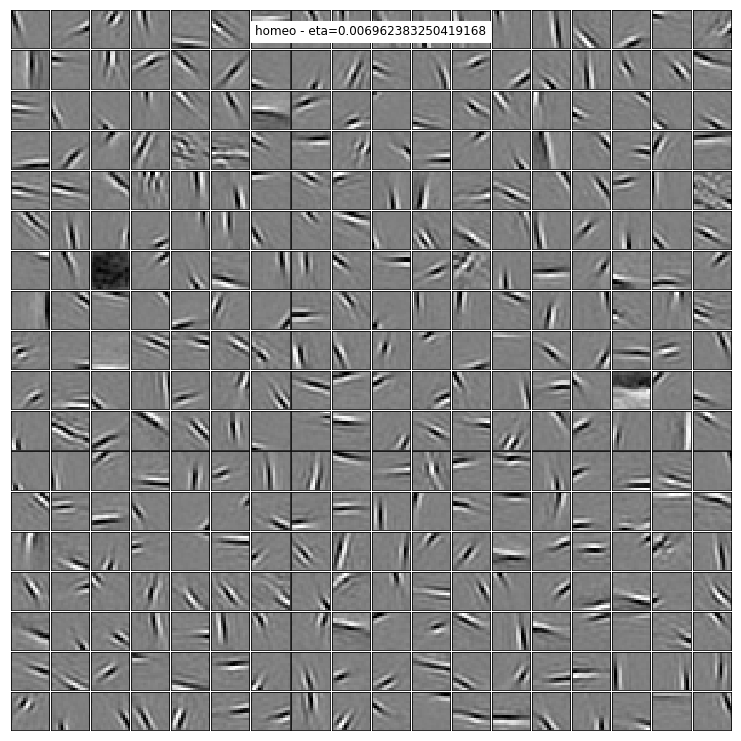

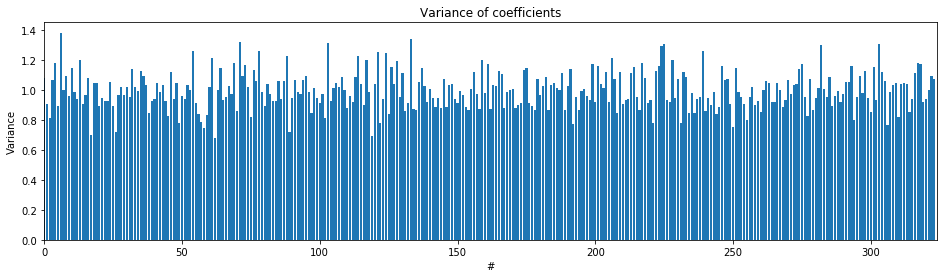

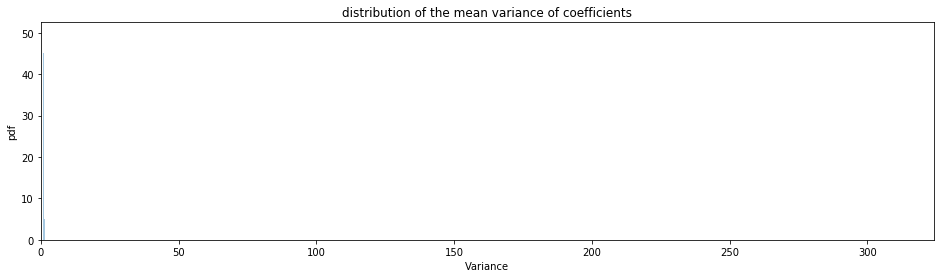

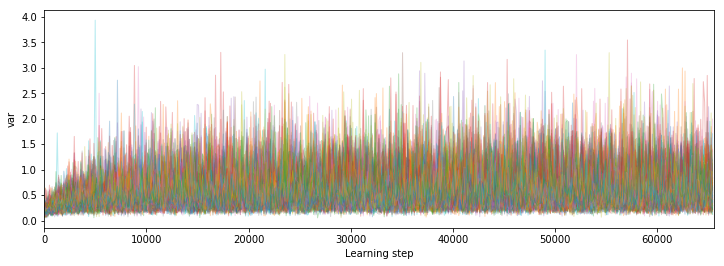

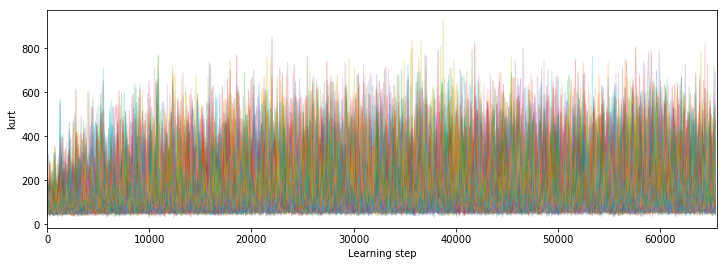

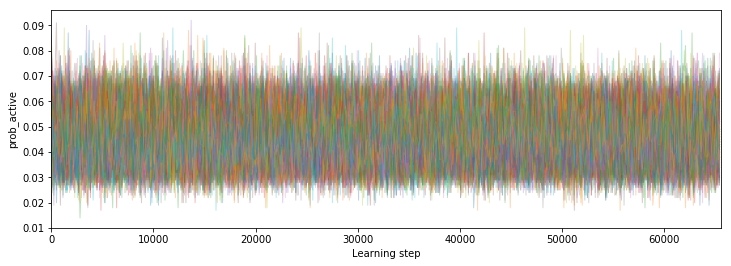

No cache found data_cache/homeo - eta=0.015_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   65536 (elapsed time:   0s,  0.0mn)
Iteration  6554 /   65536 (elapsed time:  1452s,  24.0mn)
Iteration  13108 /   65536 (elapsed time:  2838s,  47.0mn)
Iteration  19662 /   65536 (elapsed time:  4213s,  70.0mn)
Iteration  26216 /   65536 (elapsed time:  5605s,  93.0mn)
Iteration  32770 /   65536 (elapsed time:  7015s,  116.0mn)
Iteration  39324 /   65536 (elapsed time:  8386s,  139.0mn)


In [ ]:
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = 'homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()

In [ ]:
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.eta_homeo:
    matname = 'homeo - eta_homeo={eta_homeo}'.format(eta_homeo=eta_homeo)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta_homeo=eta_homeo, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()

In [ ]:
2**np.arange(N_scan)

In [ ]:
for l0_sparseness in 2**np.arange(N_scan):
    matname = 'homeo - l0_sparseness={l0_sparseness}'.format(l0_sparseness=l0_sparseness)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              l0_sparseness=l0_sparseness, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)      
    plt.show()

## Version used

In [ ]:
%load_ext version_information

In [ ]:
%version_information numpy, shl_scripts